In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Spatial aggregation

#### 1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [14]:
df = pd.read_csv('Data.csv')
df
avg= df.groupby('state')['PM2.5'].mean()
highest_avg= avg.idxmax()
highest_avg
print("The state with the highest average PM2.5 concentration is :", highest_avg)

The state with the highest average PM2.5 concentration is : Delhi


#### 2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [15]:
# Convert Timestamp to datetime format and filter data for hazardous PM2.5 levels in 2023
data_2023 = df[pd.to_datetime(df['Timestamp'], errors='coerce').dt.year == 2023]
data_2023 = data_2023[data_2023['PM2.5'] > 300]

# Identify the state with the most hazardous days
most_hazardous_state = data_2023.groupby('state')['Timestamp'].nunique().idxmax()
most_hazardous_days = data_2023.groupby('state')['Timestamp'].nunique().max()

# Display the result
print(f"The state with the most hazardous PM2.5 days in 2023 is {most_hazardous_state} with {most_hazardous_days} days.")


The state with the most hazardous PM2.5 days in 2023 is Delhi with 49 days.


#### 3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability).

In [16]:
# Calculate the standard deviation (as a measure of variability) for PM2.5 levels in 2023
variability_per_state = data_2023.groupby('state')['PM2.5'].std().sort_values(ascending=False)

# Identify the state with the highest variability
highest_variability_state = variability_per_state.idxmax()
highest_variability_value = variability_per_state.max()

# Display the result
print(f"The state with the highest variability in PM2.5 levels in 2023 is {highest_variability_state} with a standard deviation of {highest_variability_value:.2f}.")

The state with the highest variability in PM2.5 levels in 2023 is Madhya Pradesh with a standard deviation of 319.67.


#### 4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [32]:
# Ensure the 'Timestamp' column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter data for the Covid period (2020-2021)
data_covid = df[(df['Timestamp'].dt.year >= 2020) & (df['Timestamp'].dt.year <= 2021)]

# Calculate the average PM2.5 concentration per state during Covid period
avg_pm25_covid_per_state = data_covid.groupby('state')['PM2.5'].mean().sort_values()

# Identify the state with the lowest average PM2.5
lowest_avg_pm25_state = avg_pm25_covid_per_state.idxmin()
lowest_avg_pm25_value = avg_pm25_covid_per_state.min()

# Display the result
print(f"The state with the lowest average PM2.5 levels during 2020-2021 is {lowest_avg_pm25_state} with an average of {lowest_avg_pm25_value:.2f} µg/m³.")


The state with the lowest average PM2.5 levels during 2020-2021 is Mizoram with an average of 14.32 µg/m³.


# Temporal Aggregation

#### 1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [33]:
# Filter data for August 2020
data_aug_2020 = df[(df['Timestamp'].dt.month == 8) & (df['Timestamp'].dt.year == 2020)]

# Get the station with the highest PM2.5 value by sorting and selecting the first row
max_pm25_station = data_aug_2020.sort_values('PM2.5', ascending=False).iloc[0]

# Display the result
print(f"The station with the highest PM2.5 in August 2020 is {max_pm25_station['station']} with a PM2.5 level of {max_pm25_station['PM2.5']} µg/m³.")


The station with the highest PM2.5 in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with a PM2.5 level of 805.51 µg/m³.


#### 2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
#### [Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [34]:
station_name = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
data_2018 = df[(df['Timestamp'].dt.year == 2018) & (df['station'] == station_name)]

# Define the seasons and their respective months
seasons = {'Winter': [12, 1, 2], 'Summer': [3, 4, 5], 'Monsoon': [6, 7, 8, 9]}

# Calculate average PM2.5 for each season using a more compact approach
avg_pm25_season = {season: data_2018[data_2018['Timestamp'].dt.month.isin(months)]['PM2.5'].mean() for season, months in seasons.items()}

# Identify the season with the highest PM2.5 value
highest_pollution_season = max(avg_pm25_season, key=lambda season: avg_pm25_season[season])

# Display the results
for season, avg_pm25 in avg_pm25_season.items():
    print(f"Average PM2.5 in {season} 2018: {avg_pm25:.2f} µg/m³")

print(f"The season with the highest pollution in 2018 is {highest_pollution_season}.")


Average PM2.5 in Winter 2018: 67.49 µg/m³
Average PM2.5 in Summer 2018: nan µg/m³
Average PM2.5 in Monsoon 2018: 34.43 µg/m³
The season with the highest pollution in 2018 is Winter.


#### 3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
    Calculate the monthly average PM2.5 for weekdays and weekends separately
    X-axis: Months (January to December).
    Y-axis: Average PM2.5 levels.
    Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.



C:\Users\HELLO\AppData\Local\Temp\ipykernel_22572\3823919231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Day_Type'] = ['Weekday' if x < 5 else 'Weekend' for x in data_2021['Timestamp'].dt.weekday]


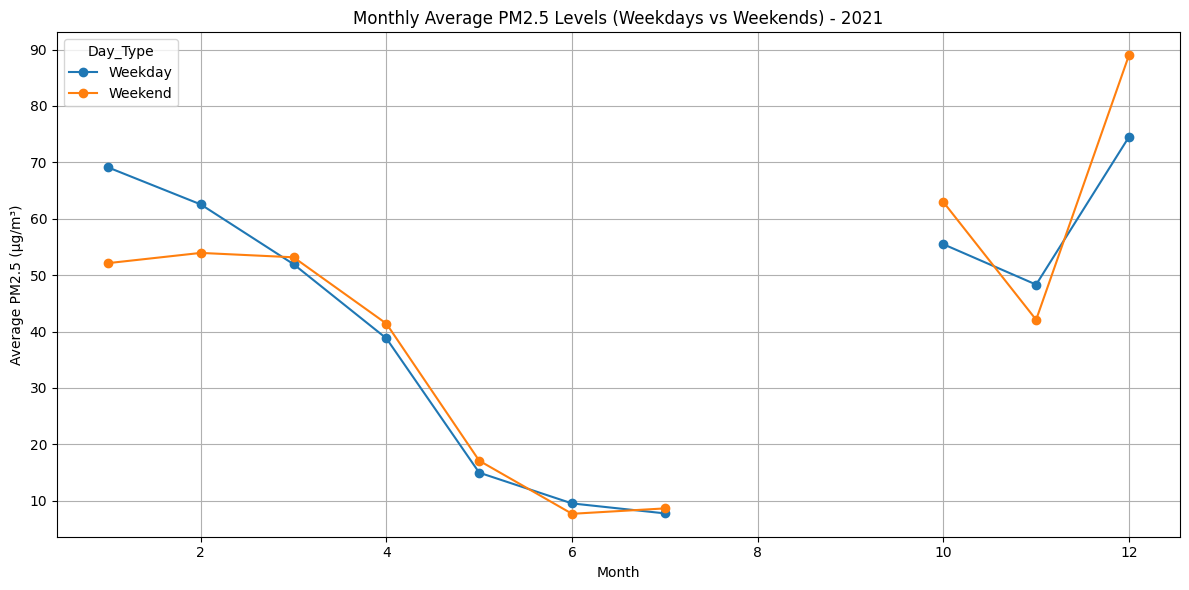

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for 2021 and the specified station
data_2021 = df[(df['Timestamp'].dt.year == 2021) & (df['station'] == station_name)]

# Add a column for Day_Type (Weekday or Weekend)
data_2021['Day_Type'] = ['Weekday' if x < 5 else 'Weekend' for x in data_2021['Timestamp'].dt.weekday]

# Calculate monthly average PM2.5 for weekdays and weekends
monthly_avg_pm25 = data_2021.groupby([data_2021['Timestamp'].dt.month, 'Day_Type'])['PM2.5'].mean().unstack()

# Plot the data
monthly_avg_pm25.plot(figsize=(12, 6), marker='o')

# Customize the plot
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) - 2021')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Spatio-temporal aggregation

#### 1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [36]:
# Filter data for 2022
data_2022 = df[df['Timestamp'].dt.year == 2022]

# Define Monsoon and Summer months
monsoon_months = [6, 7, 8, 9]
summer_months = [3, 4, 5]

# Calculate the average PM2.5 for each state during Monsoon and Summer
avg_pm25_monsoon = data_2022[data_2022['Timestamp'].dt.month.isin(monsoon_months)].groupby('state')['PM2.5'].mean()
avg_pm25_summer = data_2022[data_2022['Timestamp'].dt.month.isin(summer_months)].groupby('state')['PM2.5'].mean()

# Calculate percentage change using the formula
percentage_change = ((avg_pm25_monsoon - avg_pm25_summer) / avg_pm25_summer) * 100

# Find the state with the highest absolute difference
most_difference_state = percentage_change.abs().idxmax()
most_difference_value = percentage_change[most_difference_state]

# Display the result
print(f"The state with the most percentage difference in PM2.5 levels (Monsoon vs Summer) for 2022 is {most_difference_state} with a change of {most_difference_value:.2f}%.")


The state with the most percentage difference in PM2.5 levels (Monsoon vs Summer) for 2022 is Assam with a change of -61.18%.


#### 2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

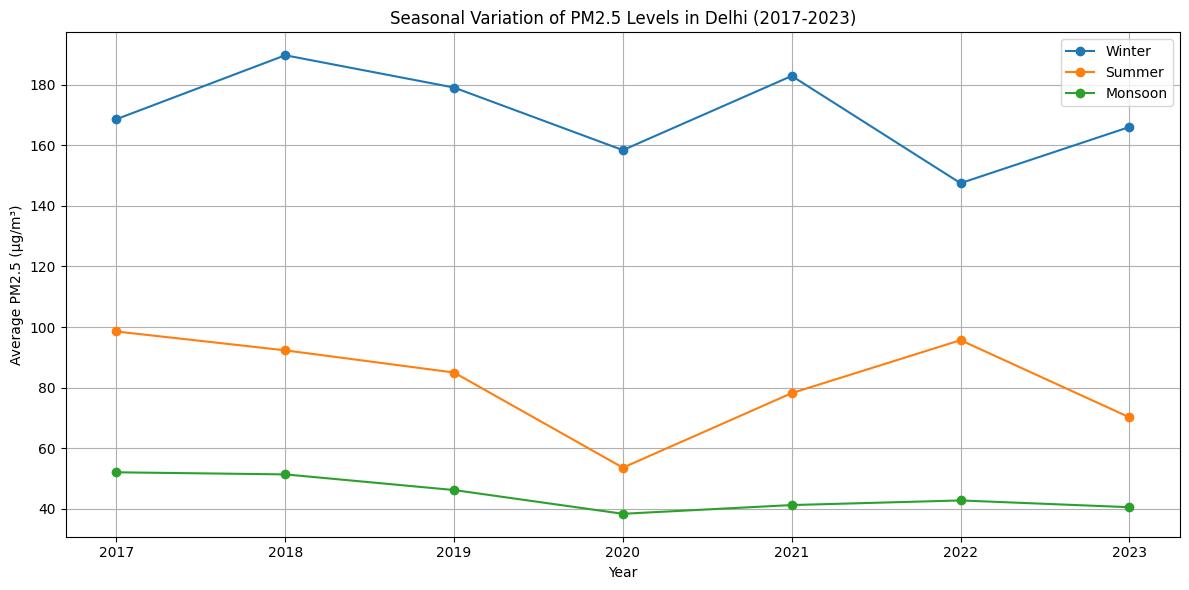

In [37]:
# Filter data for Delhi
delhi_data = df[(df['state'] == 'Delhi') & (df['Timestamp'].dt.year.between(2017, 2023))]

# Define seasons
seasons = {
    'Winter': [12, 1, 2],
    'Summer': [3, 4, 5],
    'Monsoon': [6, 7, 8, 9]
}

# Calculate average PM2.5 for each season from 2017 to 2023
seasonal_avg_pm25 = {
    season: delhi_data[delhi_data['Timestamp'].dt.month.isin(months)].groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean()
    for season, months in seasons.items()
}

plt.figure(figsize=(12, 6))
for season, data in seasonal_avg_pm25.items():
    plt.plot(data.index, data.values, label=season, marker='o')

plt.title('Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

######

#### 3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

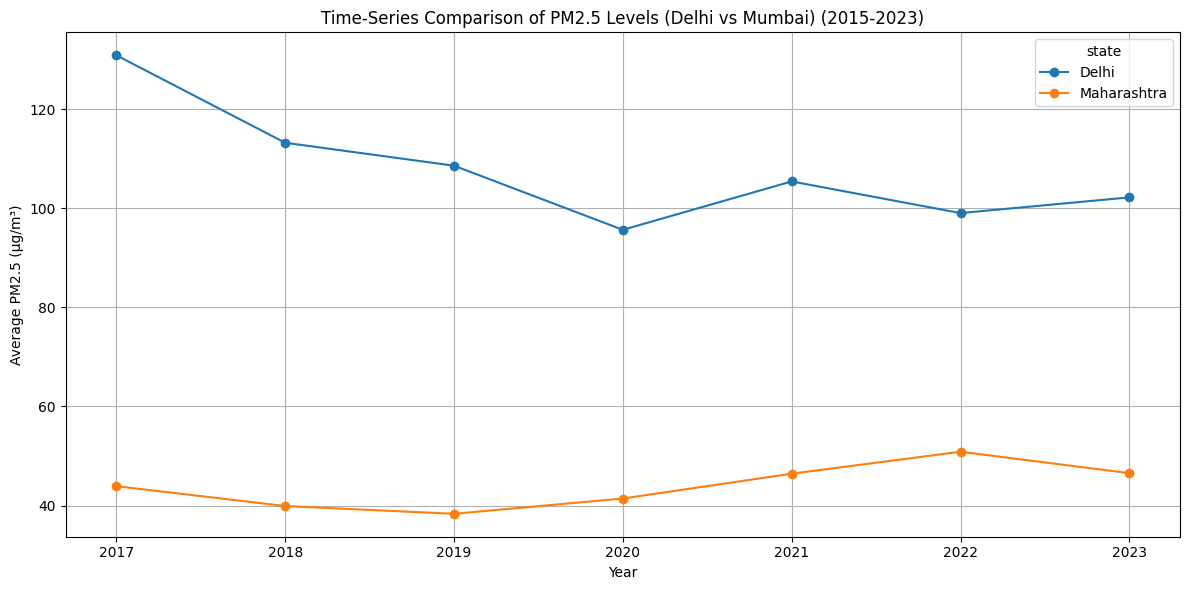

In [38]:
# Filter data for Delhi and Mumbai from 2015 to 2023
delhi_mumbai_data = df[df['state'].isin(['Delhi', 'Maharashtra']) & df['Timestamp'].dt.year.isin(range(2015, 2024))]

# Calculate average PM2.5 by year for Delhi and Mumbai
avg_pm25_by_year = delhi_mumbai_data.pivot_table(index=delhi_mumbai_data['Timestamp'].dt.year, columns='state', values='PM2.5', aggfunc='mean')

# Plot the time-series comparison
avg_pm25_by_year.plot(figsize=(12, 6), marker='o')

# Customize the plot
plt.title('Time-Series Comparison of PM2.5 Levels (Delhi vs Mumbai) (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


###### 

# Population-Based

#### 1. Which state in India has the highest number of monitoring stations relative to its population?

In [39]:
# Read the State data
state_df = pd.read_csv('State_data.csv')

# Ensure the Timestamp column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Count unique monitoring stations per state
station_counts = df.groupby('state')['station'].nunique()

# Merge state data with the population information
state_population = state_df.set_index('State')['Population']

# Calculate stations per million people by dividing the number of stations by the population (in millions)
stations_per_million = station_counts / (state_population / 1e6)

# Get the state with the highest stations-to-population ratio
highest_station_ratio_state = stations_per_million.idxmax()
highest_station_ratio_value = stations_per_million.max()

# Display the result
print(f"The state with the highest number of monitoring stations relative to its population is {highest_station_ratio_state} with {highest_station_ratio_value:.2f} stations per million people.")


The state with the highest number of monitoring stations relative to its population is Chandigarh with 2.84 stations per million people.


#### 2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

C:\Users\HELLO\AppData\Local\Temp\ipykernel_22572\2414630738.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_polluted_states.values, y=top_5_polluted_states.index, palette='Reds_r')


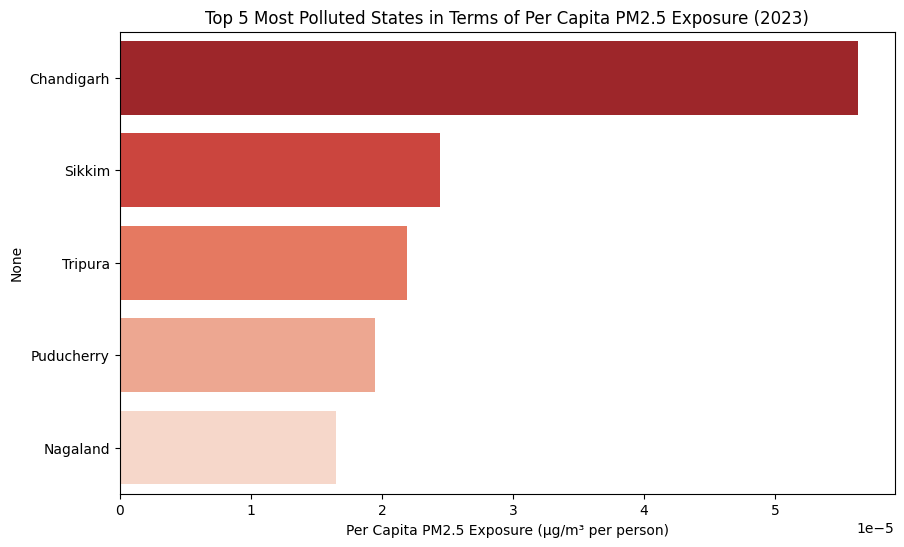

In [40]:
# Filter data for the year 2023
pm25_2023 = df[df['Timestamp'].dt.year == 2023]

# Merge the PM2.5 data with the population data
pm25_population = pm25_2023.groupby('state')['PM2.5'].mean()
pm25_population = pm25_population / state_df.set_index('State')['Population']

# Get the top 5 most polluted states based on per capita PM2.5 exposure
top_5_polluted_states = pm25_population.nlargest(5)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_polluted_states.values, y=top_5_polluted_states.index, palette='Reds_r')
plt.xlabel('Per Capita PM2.5 Exposure (µg/m³ per person)')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure (2023)')
plt.show()


#### 3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
    X-axis: Population density (people per square kilometer).
    Y-axis: Average PM2.5 concentration.
    Use a scatter plot to show the relationship, where each point represents a state.


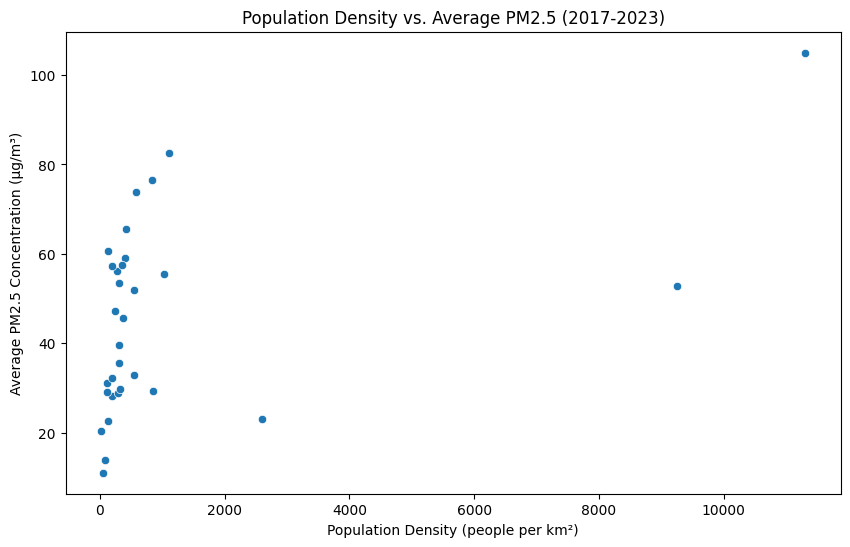

Correlation between population density and PM2.5: 0.46


In [41]:
# Filter data for 2017-2023 and calculate average PM2.5 by state
avg_pm25_per_state = df[df['Timestamp'].dt.year.isin(range(2017, 2024))].groupby('state')['PM2.5'].mean()

# Merge with population and area data
merged_data = avg_pm25_per_state.reset_index().merge(state_df[['State', 'Population', 'Area (km2)']], left_on='state', right_on='State')

# Calculate population density
merged_data['Population_Density'] = merged_data['Population'] / merged_data['Area (km2)']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population_Density', y='PM2.5', data=merged_data)
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.title('Population Density vs. Average PM2.5 (2017-2023)')
plt.show()

# Calculate and display the correlation
correlation = merged_data['Population_Density'].corr(merged_data['PM2.5'])
print(f"Correlation between population density and PM2.5: {correlation:.2f}")


# Area Based

#### 1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
    X-axis: States.
    Y-axis: PM2.5 concentration per square kilometer.
#### Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


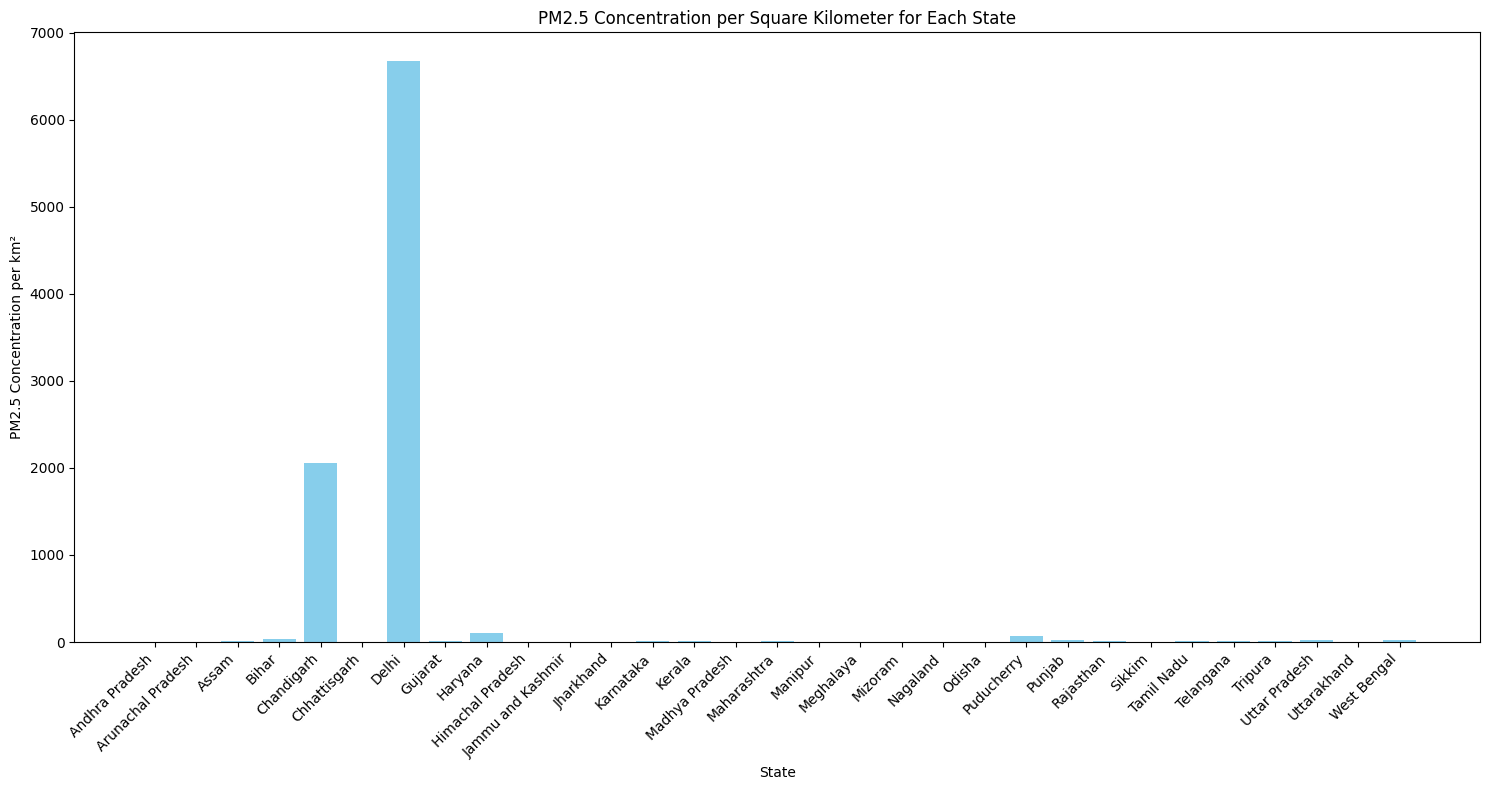


State with the highest PM2.5 concentration per square kilometer: Delhi


In [42]:
# Calculate total PM2.5 concentration per state
total_pm25_per_state = df.groupby("state")["PM2.5"].sum().reset_index()

# Merge with population and area data
merged_data = total_pm25_per_state.merge(state_df[['State', 'Area (km2)']], left_on='state', right_on='State')

# Calculate PM2.5 per square kilometer
merged_data['PM2.5_per_km2'] = merged_data['PM2.5'] / merged_data['Area (km2)']

# Plot the results
plt.figure(figsize=(15, 8))
plt.bar(merged_data['State'], merged_data['PM2.5_per_km2'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per km²')
plt.title('PM2.5 Concentration per Square Kilometer for Each State')
plt.tight_layout()
plt.show()

# Find and display the state with the highest PM2.5 concentration per km²
state_highest_pm25 = merged_data.loc[merged_data['PM2.5_per_km2'].idxmax(), 'State']
print(f"\nState with the highest PM2.5 concentration per square kilometer: {state_highest_pm25}")


#### 2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

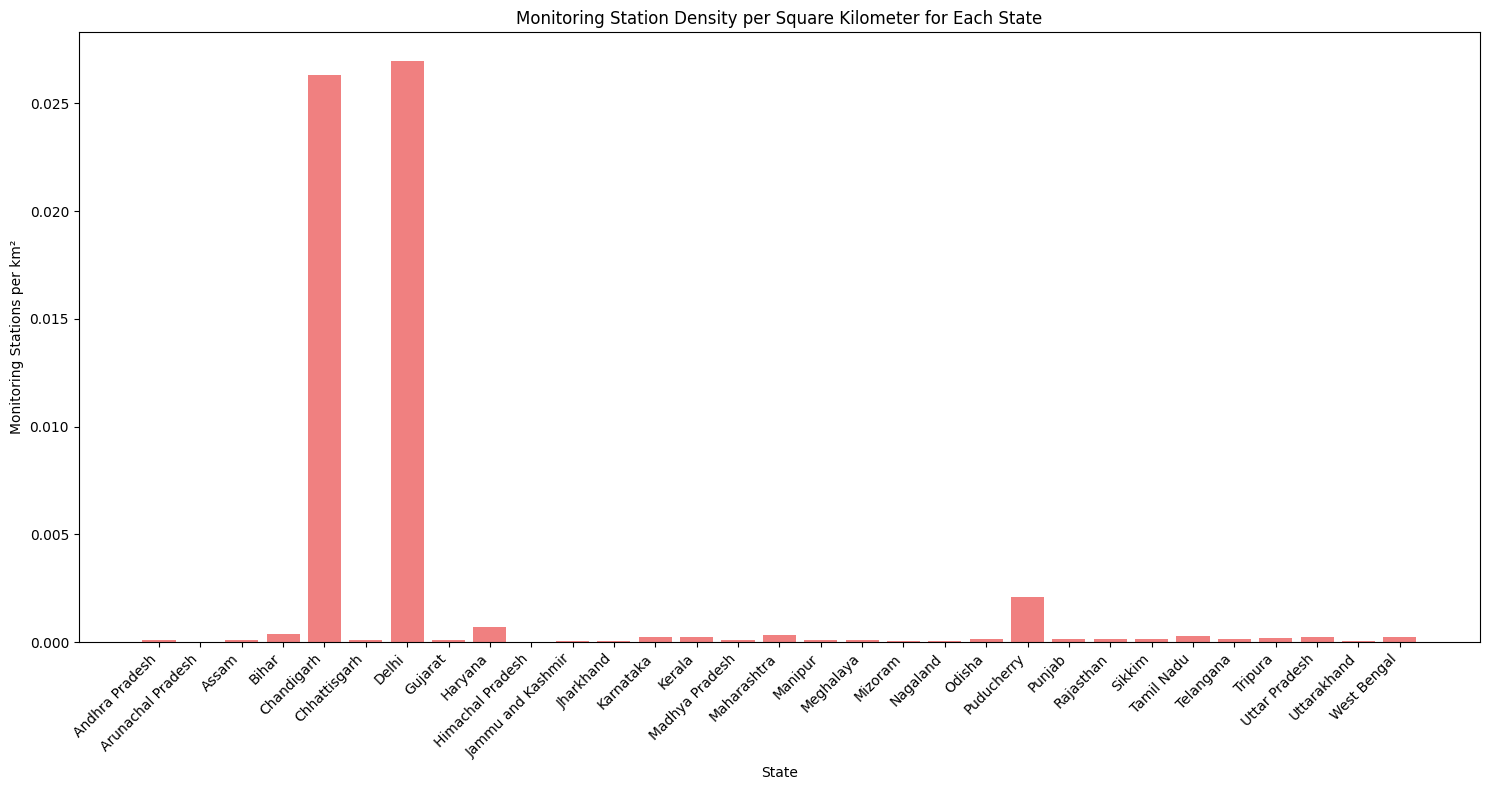


State with the highest density of monitoring stations: Delhi


In [43]:
# Count the number of monitoring stations and merge with state area data
stations_per_state = df.groupby("state")["station"].nunique().reset_index()
merged_data = stations_per_state.merge(state_df[['State', 'Area (km2)']], left_on='state', right_on='State')

# Calculate monitoring stations per square kilometer
merged_data['Stations_per_km2'] = merged_data['station'] / merged_data['Area (km2)']

# Plot the results
plt.figure(figsize=(15, 8))
plt.bar(merged_data['State'], merged_data['Stations_per_km2'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Monitoring Stations per km²')
plt.title('Monitoring Station Density per Square Kilometer for Each State')
plt.tight_layout()
plt.show()

# Identify and display the state with the highest monitoring station density
state_highest_density = merged_data.loc[merged_data['Stations_per_km2'].idxmax(), 'State']
print(f"\nState with the highest density of monitoring stations: {state_highest_density}")


#### 3.Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [44]:
# Convert the Timestamp column to datetime format and handle errors
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce", dayfirst=True)

# Remove rows with NaT in the Timestamp column
df = df.dropna(subset=["Timestamp"])

# Filter data for the year 2021 and relevant states
data_2021 = df[(df["Timestamp"].dt.year == 2021) &
                    (df["state"].isin(["Maharashtra", "Madhya Pradesh"]))]

# Calculate the average PM2.5 for Maharashtra and Madhya Pradesh
avg_pm25_per_state = data_2021.groupby("state")["PM2.5"].mean().reset_index()
avg_pm25_per_state.columns = ["State", "Average_PM2.5"]

# Calculate population density for Maharashtra and Madhya Pradesh
state_density = state_df[state_df["State"].isin(["Maharashtra", "Madhya Pradesh"])].copy()
state_density["Population_Density"] = state_density["Population"] / state_density["Area (km2)"]

# Merge average PM2.5 with population density
comparison_data = pd.merge(avg_pm25_per_state, state_density, on="State")

# Print the comparison
print("Comparison of Average PM2.5 and Population Density:\n")
display(comparison_data)

Comparison of Average PM2.5 and Population Density:



,State,Average_PM2.5,Population,Area (km2),Population_Density
0,Madhya Pradesh,47.095952,72626809,308252,235.608557
1,Maharashtra,46.440044,112374333,307713,365.192023


# Funding Based

#### 1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [45]:
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')
# Convert Timestamp to datetime and filter for 2021
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce", dayfirst=True)
df = df.dropna(subset=["Timestamp"])
data_2021 = df[df["Timestamp"].dt.year == 2021]

# Create a list of states that received NCAP funding
funded_states = ncap_funding_df["State"].unique()

# Add a new column to indicate whether a state received NCAP funding
data_2021["NCAP_Funded"] = data_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")

# Calculate the average PM2.5 for funded and non-funded states
avg_pm25_comparison = data_2021.groupby("NCAP_Funded")["PM2.5"].mean().reset_index()
avg_pm25_comparison.columns = ["NCAP_Funded", "Average_PM2.5"]

# Print the results
print("Average PM2.5 Levels in 2021 for Funded vs. Non-Funded States:")
display(avg_pm25_comparison)

Average PM2.5 Levels in 2021 for Funded vs. Non-Funded States:


C:\Users\HELLO\AppData\Local\Temp\ipykernel_22572\3458098165.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["NCAP_Funded"] = data_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")


,NCAP_Funded,Average_PM2.5
0,Funded,62.055055
1,Not Funded,60.326211


#### 2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

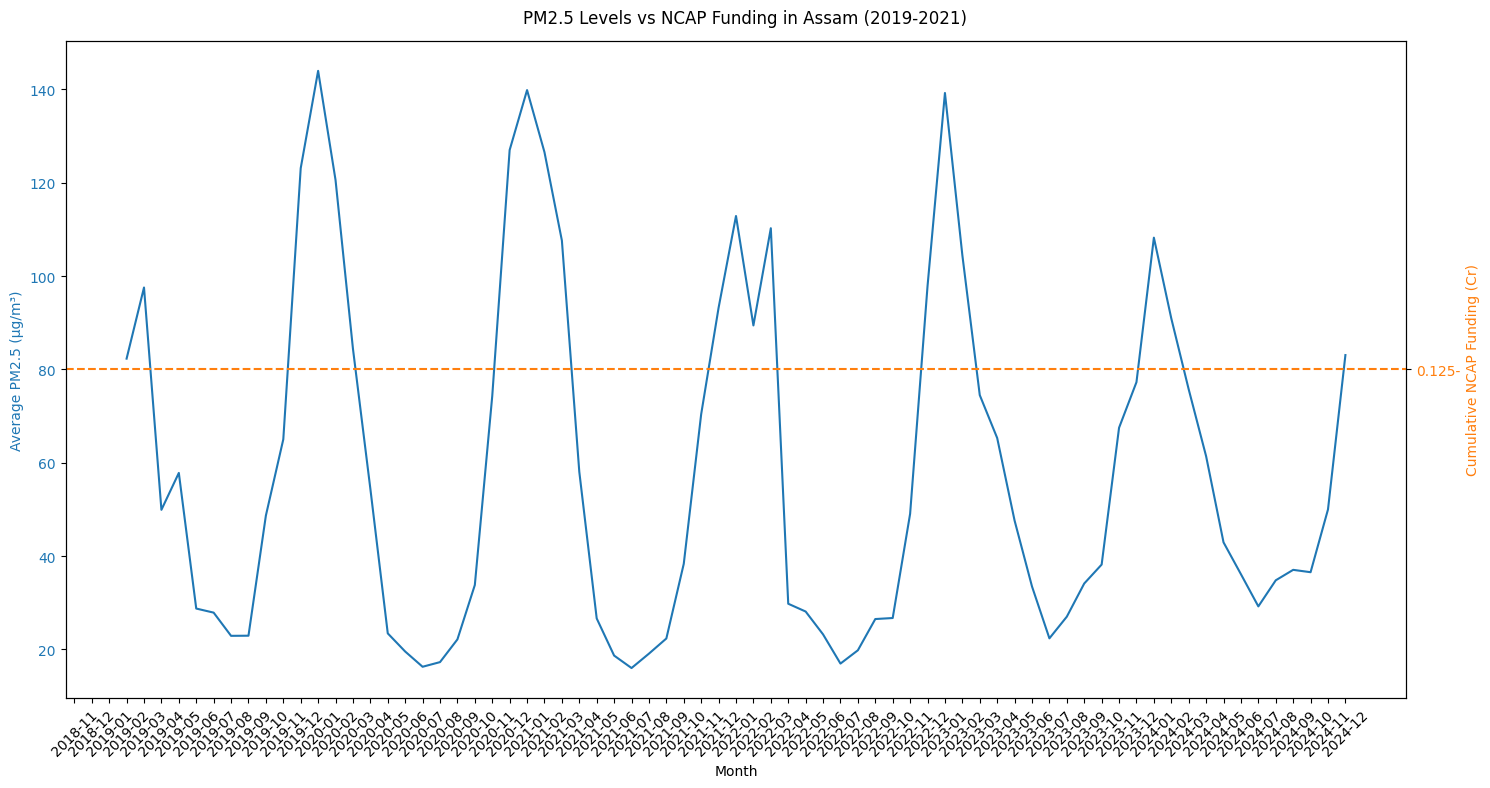

In [46]:
# Filter data for Assam and convert Timestamp to datetime
assam_data = df[df["state"] == "Assam"].dropna(subset=["Timestamp"]).copy()
assam_data["Timestamp"] = pd.to_datetime(assam_data["Timestamp"], errors="coerce", dayfirst=True)

# Group by month and calculate average PM2.5
monthly_pm25 = assam_data.groupby(assam_data["Timestamp"].dt.to_period("M").astype(str))["PM2.5"].mean().reset_index()

# Extract cumulative NCAP funding for Assam
cumulative_funding = ncap_funding_df[ncap_funding_df["State"] == "Assam"][
    ["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]
].sum(axis=1).values[0]

# Create a time series plot for PM2.5 and NCAP funding
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot PM2.5 levels
ax1.plot(monthly_pm25["Timestamp"], monthly_pm25["PM2.5"], color="tab:blue", label="Average PM2.5 (µg/m³)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Average PM2.5 (µg/m³)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.tick_params(axis="x", rotation=45)

# Plot NCAP cumulative funding as a constant line
ax2 = ax1.twinx()
ax2.axhline(y=cumulative_funding, color="tab:orange", linestyle="--", label="Cumulative NCAP Funding (Cr)")
ax2.set_ylabel("Cumulative NCAP Funding (Cr)", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Add a title and finalize the plot
fig.suptitle("PM2.5 Levels vs NCAP Funding in Assam (2019-2021)")
fig.tight_layout()
plt.show()


#### 3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

TypeError: can only concatenate str (not "int") to str

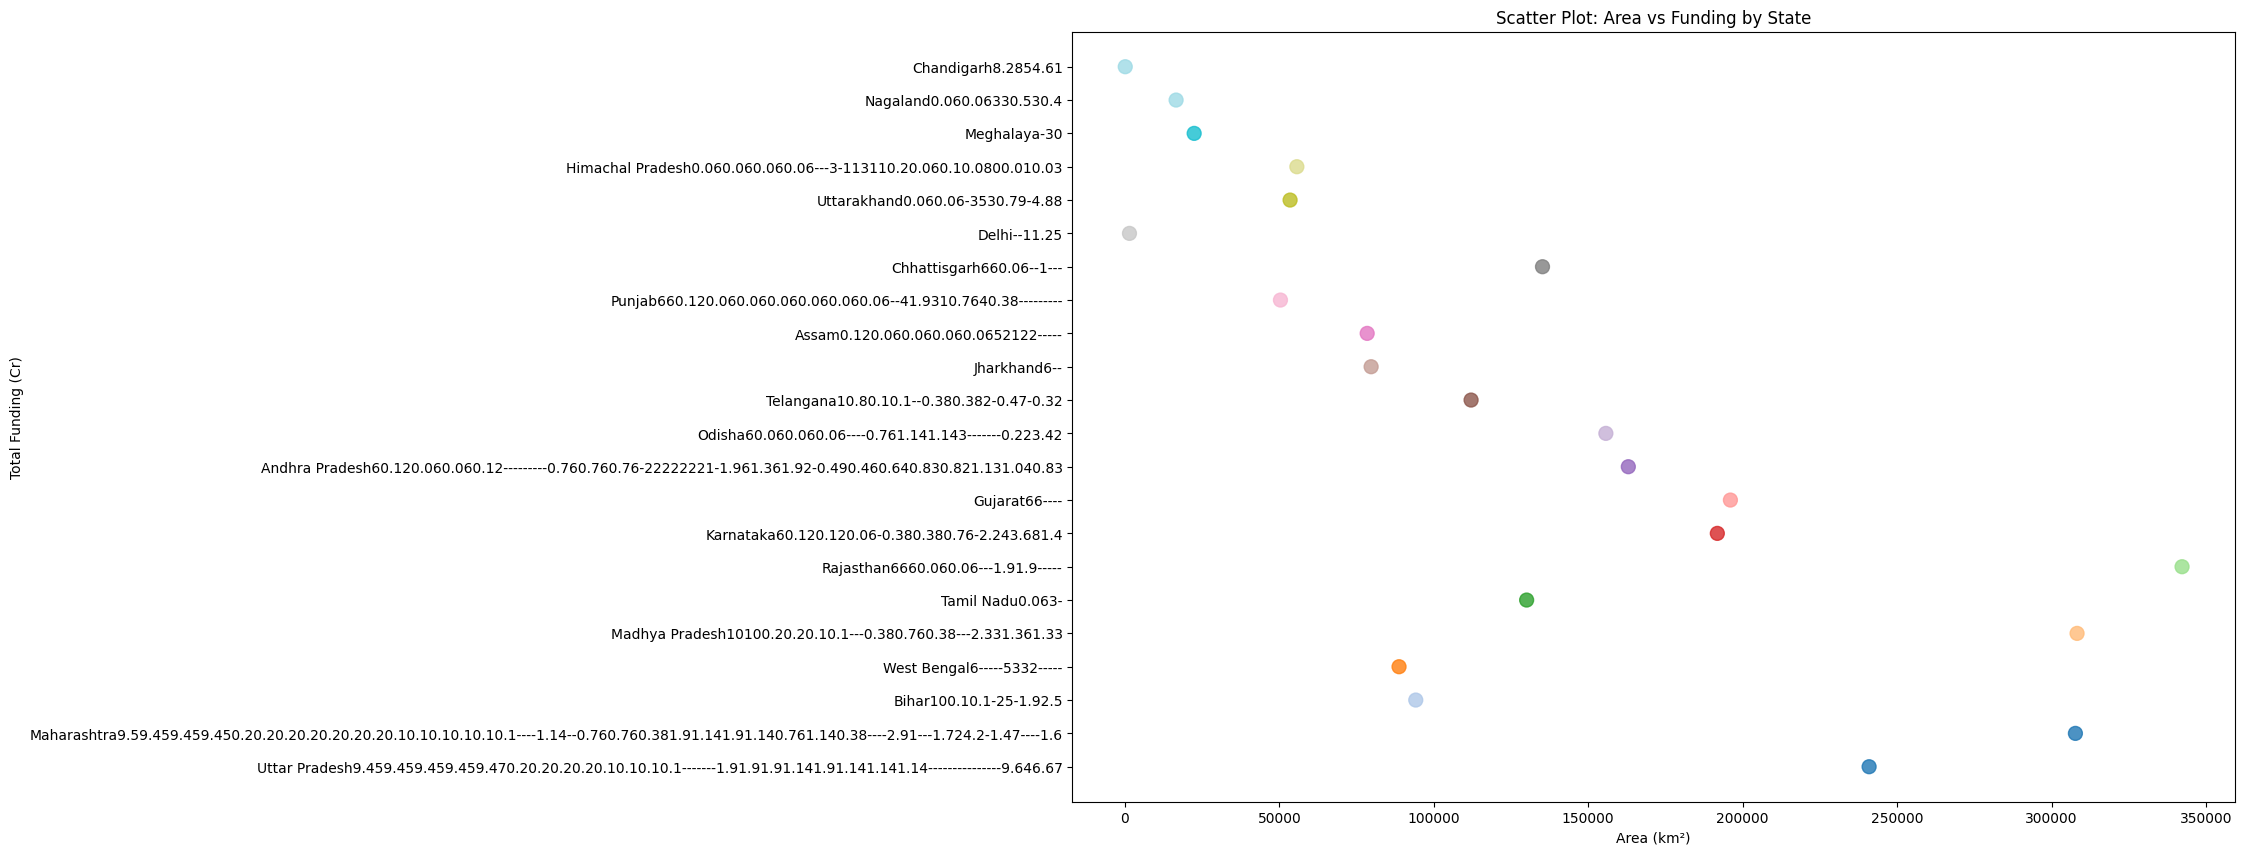

In [47]:
# Merge the funding and state data
funding_data = ncap_funding_df.groupby("State")[["Amount released during FY 2019-20",
                                                 "Amount released during FY 2020-21",
                                                 "Amount released during FY 2021-22"]].sum().reset_index()
funding_data["Total_Funding"] = funding_data.sum(axis=1)
merged_data = pd.merge(state_df, funding_data, on="State", how="inner")

# Drop rows with missing area or funding values
merged_data = merged_data.dropna(subset=["Area (km2)", "Total_Funding"])

# Plot the scatter plot
plt.figure(figsize=(15, 10))
scatter = plt.scatter(merged_data["Area (km2)"], merged_data["Total_Funding"], c=range(len(merged_data)),
                     cmap="tab20", s=100, alpha=0.8)

# Customize labels and title
plt.xlabel("Area (km²)")
plt.ylabel("Total Funding (Cr)")
plt.title("Scatter Plot: Area vs Funding by State")

# Annotate with state names
for i, row in merged_data.iterrows():
    plt.annotate(row["State"], (row["Area (km2)"], row["Total_Funding"] + 5), fontsize=9, ha="center")

# Display the legend outside the plot
plt.legend(handles=scatter.legend_elements()[0], labels=merged_data["State"].tolist(),
           bbox_to_anchor=(1.05, 1), loc="upper left", title="States")

plt.tight_layout()
plt.show()


# Miscellaneous Questions

#### 1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [49]:
# Filter data for the year 2023
data_23 = df[df['Timestamp'].dt.year == 2023]

# Calculate the average PM2.5 for each station
avg_city = data_23.groupby('station')['PM2.5'].mean()

# Identify the station with the highest average PM2.5
most_polluted_city = avg_city.idxmax()

# Filter data for the most polluted city
city_2023 = data_23[data_23['station'] == most_polluted_city]

# Calculate the total number of days in 2023 for the most polluted city
total_days = city_2023['Timestamp'].nunique()

# Calculate the number of days with PM2.5 above 300 µg/m³
hzd_days = city_2023[city_2023['PM2.5'] > 300]['Timestamp'].nunique()

# Calculate the percentage of days with PM2.5 above 300 µg/m³
per_hzd_days = (hzd_days / total_days) * 100

# Output the percentage of days with PM2.5 above 300 µg/m³
print(f"Percentage of days with PM2.5 above 300 µg/m³ in {most_polluted_city} in 2023: {per_hzd_days:.2f}%")


Percentage of days with PM2.5 above 300 µg/m³ in Town Hall - Lal Bagh, Darbhanga - BSPCB in 2023: 0.82%


#### 2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

C:\Users\HELLO\AppData\Local\Temp\ipykernel_22572\2952999327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Timestamp'].dt.month


Spike observed in 10 (Diwali or New Year)
Spike observed in 11 (Diwali or New Year)
Spike observed in 1 (Diwali or New Year)


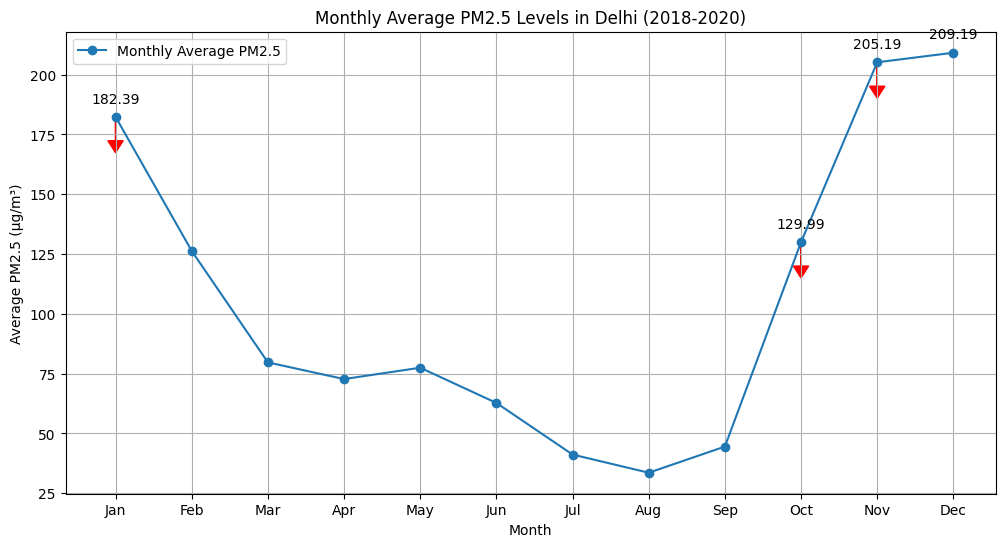

In [50]:
# Filter the dataset for Delhi data between the years 2018 and 2020
delhi_data = df[(df['state'] == 'Delhi') & (df['Timestamp'].dt.year.between(2018, 2020))]

# Extract the month from the Timestamp to create a "Month" column
delhi_data['Month'] = delhi_data['Timestamp'].dt.month

# Calculate the monthly average PM2.5 for Delhi
mnth_avg = delhi_data.groupby('Month')['PM2.5'].mean()

# Define the months typically associated with festivals (October, November, December, January)
festival_months = [10, 11, 12, 1]

# Initialize an empty list to store information about PM2.5 spikes during festivals
spike_info = []

# Create a plot for the monthly average PM2.5 levels in Delhi
plt.figure(figsize=(12, 6))
plt.plot(mnth_avg.index, mnth_avg.values, marker='o', label='Monthly Average PM2.5')

# Annotate and highlight the festival months (October, November, January)
for month in festival_months:
    avg_pm25 = mnth_avg.get(month, None)  
    if avg_pm25 is not None:
        plt.annotate(f'{avg_pm25:.2f}', (month, avg_pm25), textcoords="offset points", xytext=(0, 10), ha='center')
        if month in [10, 11, 1]:
            plt.arrow(month, avg_pm25, 0, -10, head_width=0.2, head_length=5, fc='red', ec='red')  
            spike_info.append(f"Spike observed in {month} (Diwali or New Year)")  

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.title('Monthly Average PM2.5 Levels in Delhi (2018-2020)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

# Print the information about the spikes observed in festival months
for spike in spike_info:
    print(spike)

# Show the plot
plt.show()


#### 3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

The state with the highest NCAP funding in 2020 is: Assam


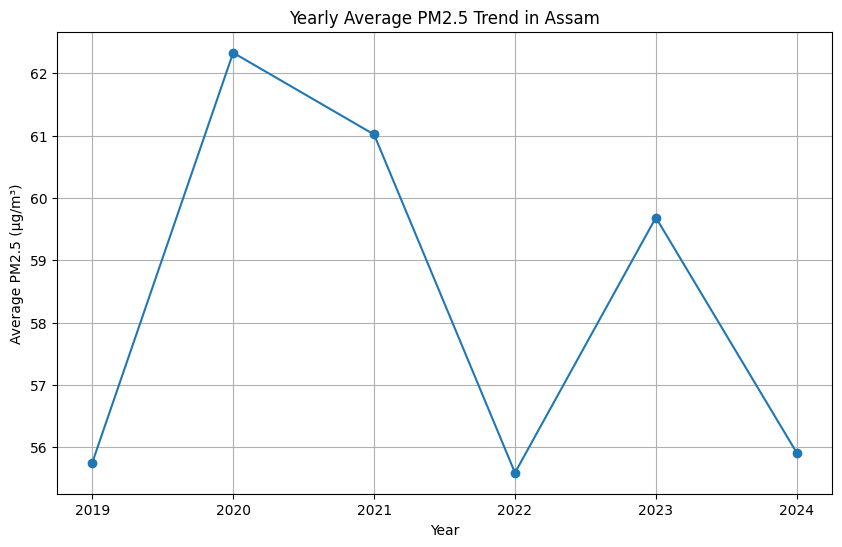

In [51]:
# Read the NCAP Funding data CSV into a dataframe
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')

# Find the state with the highest NCAP funding for FY 2020-21
highest = ncap_funding_df.loc[ncap_funding_df['Amount released during FY 2020-21'].idxmax(), 'State']

# Print the state with the highest funding in 2020
print(f"The state with the highest NCAP funding in 2020 is: {highest}")

# Filter the air quality data for the state with the highest funding
state_data = df[df['state'] == highest]

# Calculate the yearly average PM2.5 concentration for the selected state
yearly_avg = state_data.groupby(state_data['Timestamp'].dt.year)['PM2.5'].mean()

# Plot the yearly average PM2.5 levels for the selected state
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title(f"Yearly Average PM2.5 Trend in {highest}")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.grid(True)
plt.show()


#### 4. Draw the map of India and plot the sensor locations on the map.

C:\Users\HELLO\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


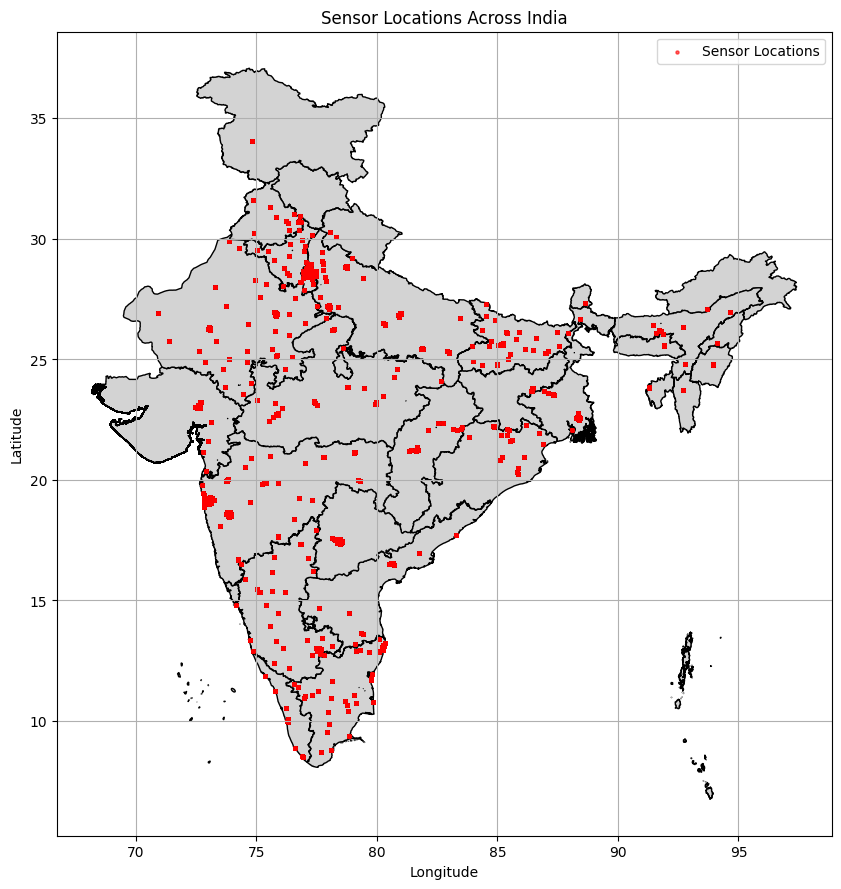

In [52]:
import geopandas as gpd

# Step 1: Load the India shapefile (directly from Colab's working directory)
india_shapefile_path = "India-States.shp"  # Ensure the filename matches exactly
india_map = gpd.read_file(india_shapefile_path)

# Step 2: Load sensor data and filter valid coordinates
sensor_data = df.dropna(subset=["latitude", "longitude"])  # Remove missing values
sensor_gdf = gpd.GeoDataFrame(sensor_data, geometry=gpd.points_from_xy(sensor_data["longitude"], sensor_data["latitude"]))

# Step 3: Plot the India map and sensor locations
fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color="lightgray", edgecolor="black")  # Draw India map
sensor_gdf.plot(ax=ax, markersize=5, color="red", alpha=0.6, label="Sensor Locations")  # Plot sensors

# Step 4: Customize the plot
plt.title("Sensor Locations Across India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

# Show the map
plt.show()

# Tell us something new

#### 1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 